<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment6_Kmeans_PineappleTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 6 - KMeans</span>

You own a supermarket mall and, through membership cards, you have collected basic customer data, including Customer ID, age, gender, annual income, and spending score.

The Spending Score is a value assigned to each customer based on predefined parameters such as purchasing behavior and shopping patterns.

Problem Statement:
As the mall owner, you want to better understand your customers, specifically identifying those who are more likely to convert into loyal buyers (target customers). This insight will help the marketing team develop effective strategies and improve customer engagement.

## Retrieving the data

a) Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

b) Read the Mall_Customers CSV file and store it as a variable.

In [3]:
customers = pd.read_csv('/content/Mall_Customers.csv')

c) Display the first few rows of the customers dataset and review its info() and describe() methods.

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis

1- Create a scatter plot to visualize the relationship between Age and Spending Score.
Don't forget to add labels to the axes.
**(10pts)**

Text(0.5, 1.0, 'Age vs Spending Score')

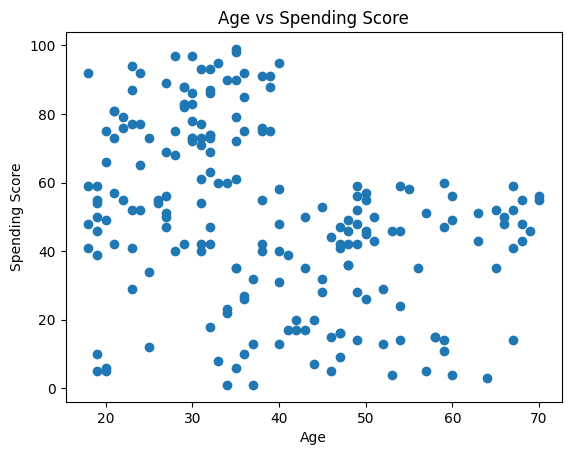

In [7]:
plt.scatter(customers['Age'], customers['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')

2- Create a scatter plot to visualize the relationship between Age and Annual Income. Don't forget to add labels to the axes. **(10pts)**

Text(0.5, 1.0, 'Age vs Annual Income')

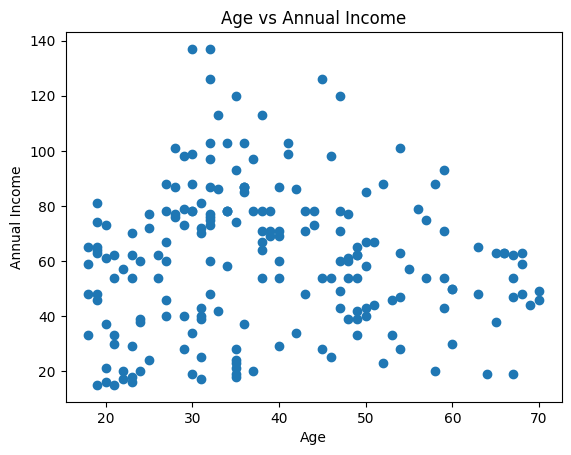

In [8]:
plt.scatter(customers['Age'], customers['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')

3- Create a scatter plot to visualize the relationship between Annual Income and Spending Score. Don't forget to add labels to the axes. **(10pts)**

Text(0.5, 1.0, 'Annual Income vs Spending Score')

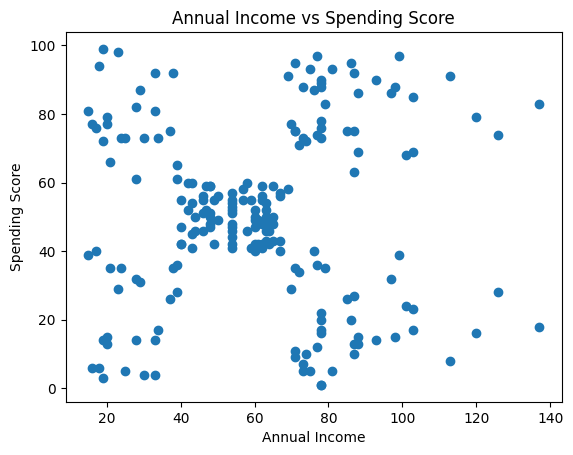

In [9]:
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')

Which features do you think are suitable for creating the clusters?

Annual Income and Spending Score.

# Elbow method

4 - Determine the optimal K value using the Elbow Method.

Don't forget to plot the chart displaying the Elbow curve.**(25 pts)**

In [10]:
from sklearn.cluster import KMeans

In [12]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)
    print("For n_clusters = {} SSE = {}".format(i, kmeans.inertia_))



For n_clusters = 1 SSE = 269981.28000000014
For n_clusters = 2 SSE = 183653.3289473683
For n_clusters = 3 SSE = 106348.37306211119
For n_clusters = 4 SSE = 73880.64496247198
For n_clusters = 5 SSE = 44448.45544793369
For n_clusters = 6 SSE = 40825.16946386947
For n_clusters = 7 SSE = 33642.57922077922
For n_clusters = 8 SSE = 26686.837785187785
For n_clusters = 9 SSE = 24766.471609793436
For n_clusters = 10 SSE = 23103.122085983905


Text(0, 0.5, 'SSE')

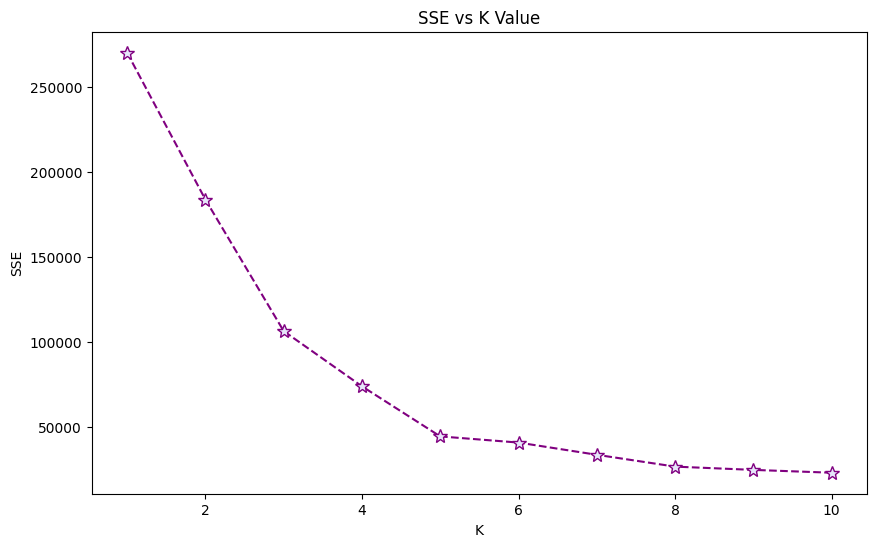

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), sse, color='purple',linestyle='--', marker='*', markerfacecolor='lavender', markersize = 10)
plt.title('SSE vs K Value')
plt.xlabel('K')
plt.ylabel('SSE')

## Training and testing the model

5 - Create an instance of the KMeans model and train (fit) it using the optimal K value found in the previous step, with Annual Income and Spending Score as features. **(15 pts)**

In [15]:
kmeans = KMeans(n_clusters=5, random_state=101)
kmeans.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=101)

6- Print the cluster labels and centroids. **(5 pts)**

In [16]:
kmeans.cluster_centers_

array([[55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [17]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

7 - Create a scatter plot to display the clusters along with their centroids as markers, using the rainbow colormap. **(25 pts)**

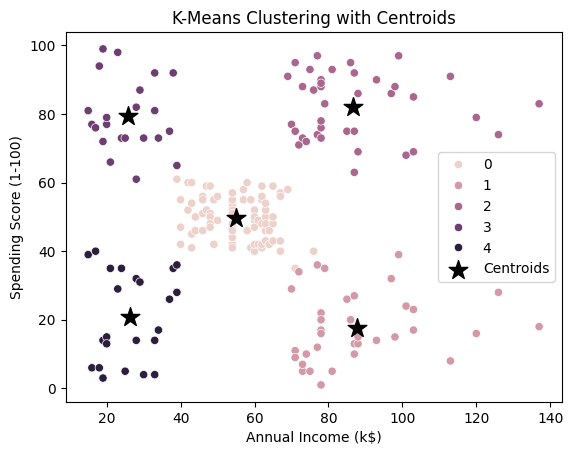

In [26]:
sns.scatterplot(data=customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='*', s=200, edgecolors='black', label='Centroids')

plt.legend()
plt.title('K-Means Clustering with Centroids')
plt.show()

Describe the clusters based on Annual Income and Spending Score.

While analyzing the clusters, you may consider adjusting the K value to better capture distinct customer segments

Seeing the graph, we can observe that we have well defined sectors of customers in our clusters. We can observe that there are customers who have low income but have higher spending tendencies, and also clients who earn more money but won't spend that much. This is also a good reference for the amount of people in each category for tailoring the marketing towards each group or maybe the most numerous one.